# **Google Advanced Data Analytics Capstone Project: Providing Data-Driven Suggestions for Salifort Motors HR (Daniel Poe, 2025-06-24)**


## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


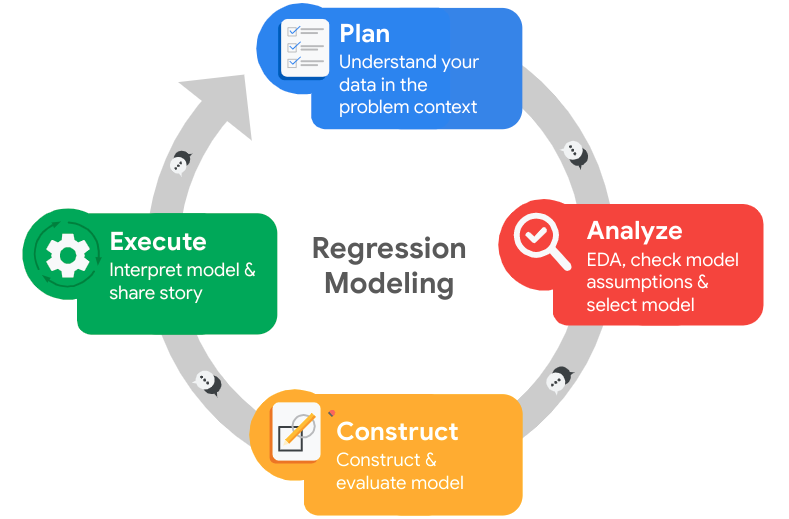

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- **Stakeholders**: HR department, management team, and company executives.

- **Goal**: To understand employee turnover, identify influencing factors, and implement retention strategies.

- **Dataset Observations**
    - Dataset includes employee attributes like satisfaction, evaluations, projects, hours, tenure, salary, and department.
    - Imbalanced target variable: More employees stayed than left.
    - Varying tenure and salary levels.

- **Resources Used**
    - Python programming and libraries (Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn)
    - Machine learning algorithms (Logistic Regression, Decision Tree, Random Forest, XGBoost)
    - Hyperparameter tuning (GridSearchCV)
    - Evaluation metrics (accuracy, precision, recall, F1-score, AUC-ROC)

- **Ethical Considerations**
    - Data privacy and security
    - Informed consent
    - Fairness and transparency in decision-making
    - Avoiding bias in data and model results

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve

from xgboost import plot_importance

from sklearn.tree import plot_tree

import pickle

import warnings
warnings.filterwarnings("ignore")

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Export cleaned data to csv
df1.to_csv('hr_capstone_dataset_cleaned.csv', index=False)
pd.read_csv("hr_capstone_dataset_cleaned.csv").head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

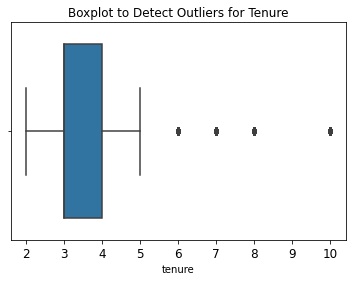

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,4))
plt.title('Boxplot to Detect Outliers for Tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [13]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

percentile25 = df1['tenure'].quantile(0.25)

percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower Limit =", lower_limit)
print("Upper Limit =", upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of Rows Containing Outliers in 'tenure':", len(outliers))

Lower Limit = 1.5
Upper Limit = 5.5
Number of Rows Containing Outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- **Relationships Between Variables**
    - Satisfaction and Attrition: Lower satisfaction levels are strongly correlated with higher attrition rates.
    - Evaluations and Attrition: While a mixed pattern was observed, employees with middle or highest evaluations might seek better opportunities elsewhere.
    - Workload and Attrition: A positive correlation exists between the number of projects, average monthly hours, and attrition. Overwork can lead to higher turnover.
    - Accidents and Attrition: Employees who have experienced work accidents are less likely to leave.

- **Data Distribution Observations**
    - Satisfaction: Employees with satisfaction scores between 0.1 and 0.4 have the highest attrition rates.
    - Evaluations: A mixed pattern suggests both average and high performers might seek new opportunities.
    - Projects: An optimal number of projects for minimizing attrition seems to be around 3.
    - Average Monthly Hours: Overwork leads to higher attrition.
    - Tenure: Employees with longer tenure might leave for better offers, indicating a higher attrition rate for experienced employees.

- **Data Transformations**
    - Ordinal Encoding: The salary column was encoded to handle categorical data.
    - One-Hot Encoding: The department column was encoded to avoid ordinal relationships and ensure equal weightage for different departments.

- **Purposes of EDA**
    - Understand data patterns, trends, and relationships.
    - Detect outliers and assess data distribution.
    - Evaluate data balance and potential biases.
    - Identify relevant features for modeling and feature engineering.
    - Address ethical considerations.

- **Resources and Ethical Considerations**
    - Used Python libraries (Pandas, NumPy, Seaborn, Matplotlib) for analysis and visualisation.
    - Prioritised data privacy and confidentiality.
    - Mitigated bias and discrimination in the data and modeling process.
    - Ensured fair and transparent practices in interpretation and communication.
    - Considered ethical implications of using the predictive model for decision-making.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

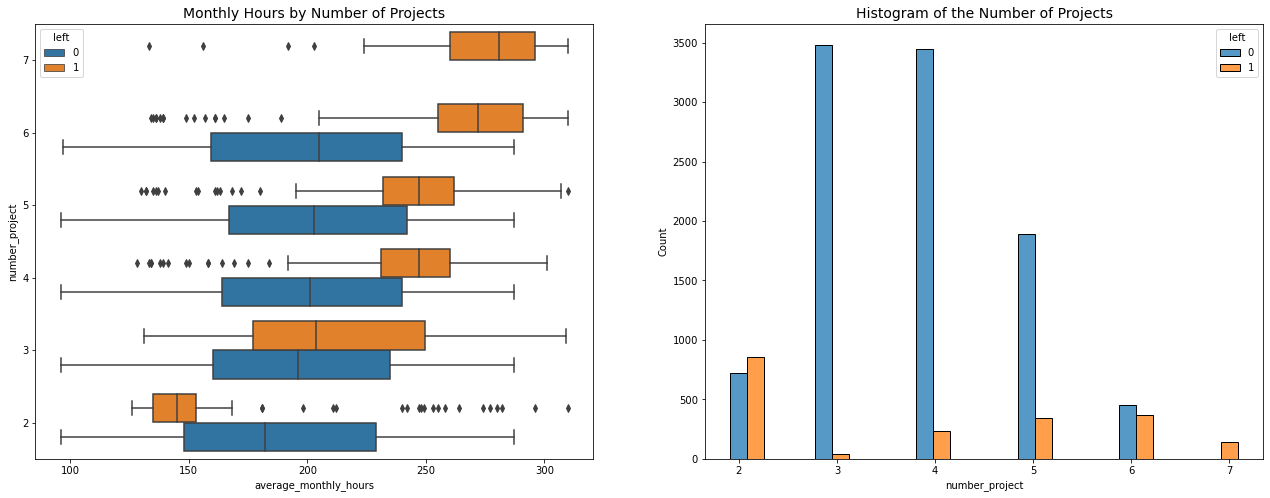

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histogram of the Number of Projects', fontsize='14')

# Display the plots
plt.show()

**Observations**: It is natural to think that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from these plots.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it is likely that they were fired. It is also likely that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it is reasonable to infer that they probably quit. The people in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash; much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left to stayed is very small for these cohorts.

4. Assuming a work week of 40 hours and two weeks of vacation per year, the average number of working hours per month of employees working Monday&ndash;Friday would be 166.67 h/month (`(50 weeks) * (40 h/week) / (12 months) = 166.67 h/month`). This means that, aside from the employees who worked on two projects, every group&mdash; even those who did not leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, I can confirm that all employees with seven projects left.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave. Next, I can examine the average monthly hours against the satisfaction levels. 

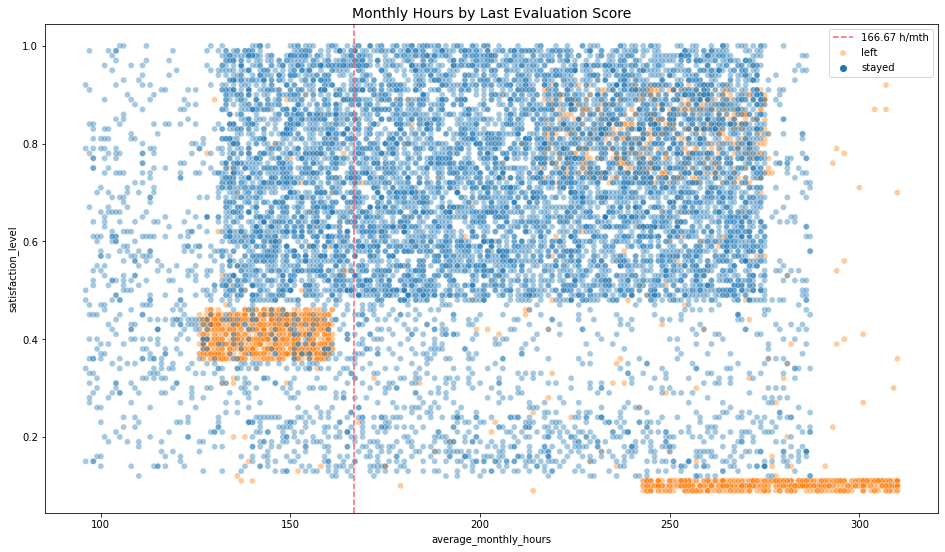

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 h/mth', ls='--')
plt.legend(labels=['166.67 h/mth', 'left', 'stayed'])
plt.title('Monthly Hours by Last Evaluation Score', fontsize='14');

**Observations**: The scatterplot above shows that there was a sizeable group of employees who worked around 240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It is likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It is difficult to speculate about why they might have left. It is possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked around 210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualisation, I could visualise satisfaction levels by tenure.

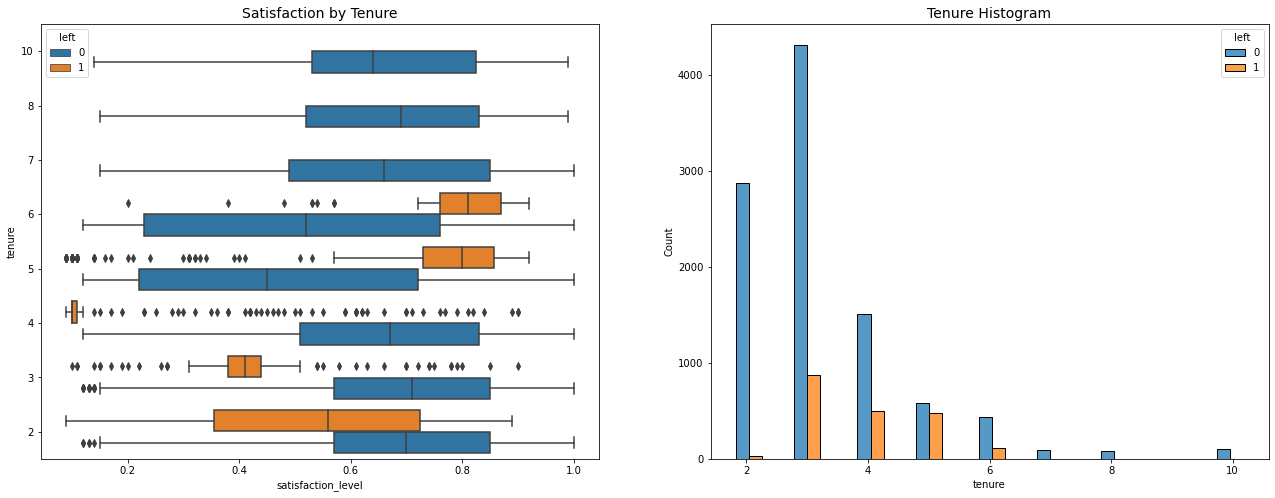

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure Histogram', fontsize='14')

plt.show();

**Observations**:
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It is worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees did not leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It is likely that they are the higher-ranking, higher-paid employees.

As the next step in analysing the data, I could calculate the mean and median satisfaction scores of employees who left and those who did not.

In [19]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, I could examine salary levels for different tenures.

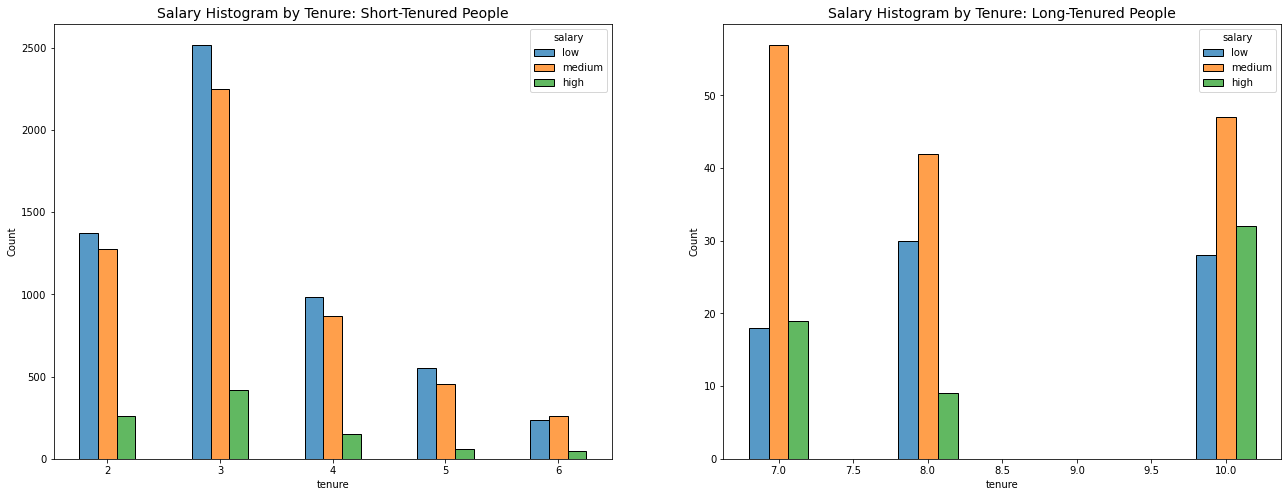

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure: Short-Tenured People', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure: Long-Tenured People', fontsize='14');

**Observations**: The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, I could explore whether there is a correlation between working long hours and receiving high evaluation scores. I then created a scatterplot of `average_monthly_hours` versus `last_evaluation`.

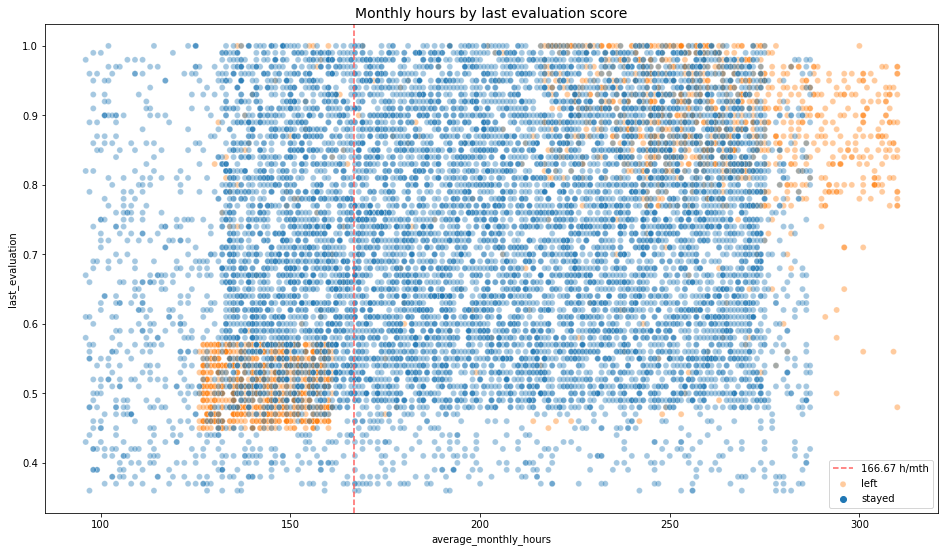

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 h/mth', ls='--')
plt.legend(labels=['166.67 h/mth', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**Observations**: The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There is not a high percentage of employees in the upper left quadrant of this plot; but working long hours does not guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, I could examine whether employees who worked very long hours were promoted in the last five years.

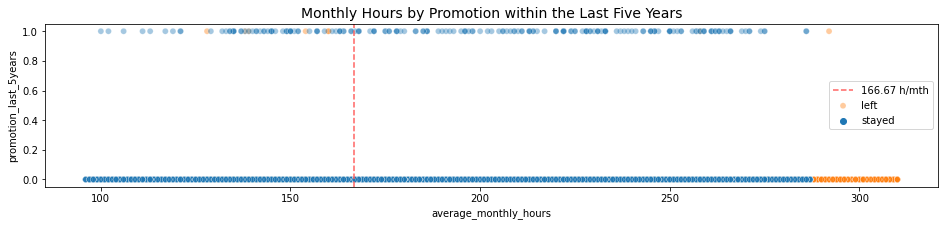

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 h/mth', 'left', 'stayed'])
plt.title('Monthly Hours by Promotion within the Last Five Years', fontsize='14');

**Obsservations**: The plot above shows the following:
- Very few employees who were promoted in the last five years left
- Very few employees who worked the most hours were promoted
- All of the employees who left were working the longest hours  

Next, I could inspect how the employees who left are distributed across departments.

In [23]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

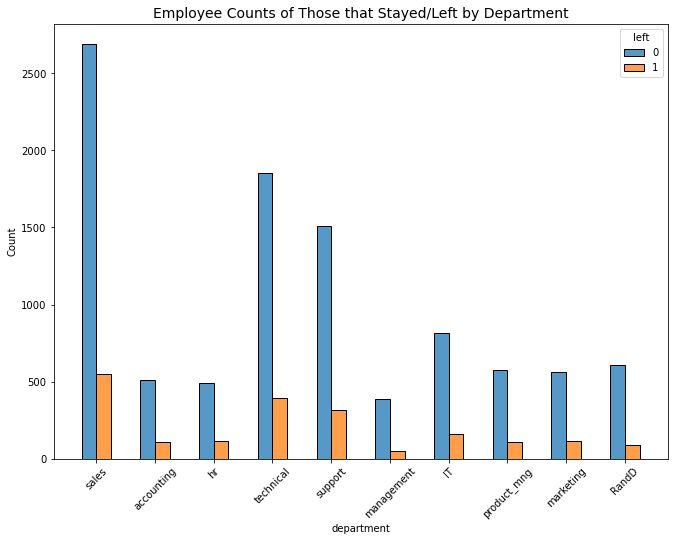

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Employee Counts of Those that Stayed/Left by Department', fontsize=14);

**Observations**: There does not seem to be any department that differs significantly in its proportion of employees who left to those who stayed. The greatest number of employees who left were from the sales department.

Lastly, I could check for strong correlations between variables in the data.

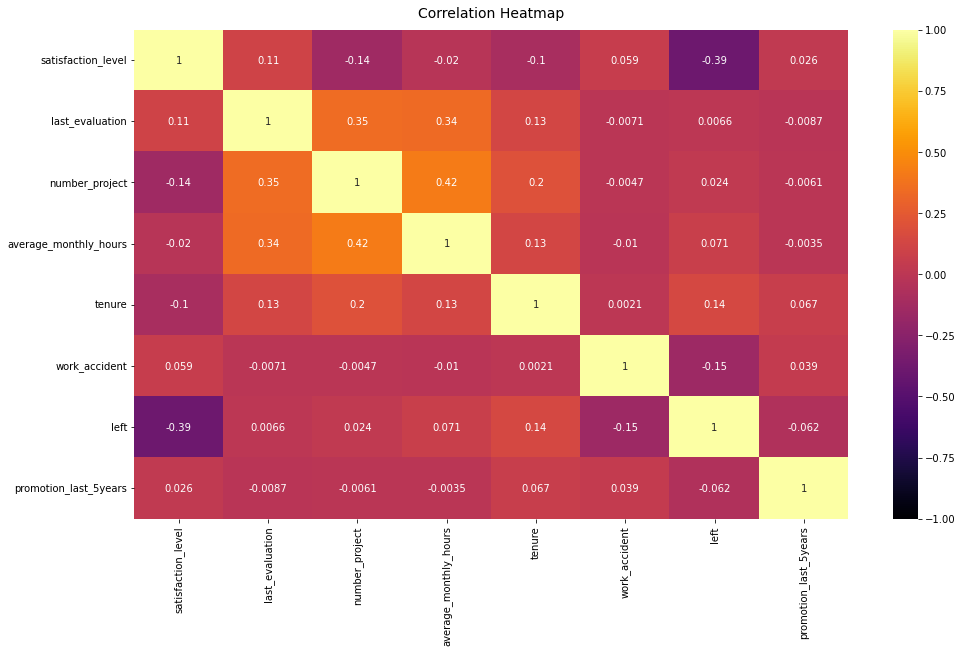

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("inferno", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There is a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal here is to predict whether an employee leaves the company, which is a categorical outcome variable. This task involves classification. Specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee did not leave).

### Identify the types of models most appropriate for this task.

Since the desired variable to predict (whether an employee leaves the company) is categorical, either a logistic regression model, or a tree-based machine learning model could be built. For this project, I have decided to build a tree-based machine learning model.

We will build a random forest model and an XGBoost model for these reasons:

- This dataset has outliers; a tree-based model is less sensitive to outliers.
- Tree-based models do not require feature scaling.
- This dataset is imbalanced. 83.4% of the dataset contains data of employees who stayed, while only 16.6% of it contains data of employees who left the company.

Since the dataset is imbalanced, F1 scores will be used as the metric instead of accuracy. The F1 score also combines information from precision and recall scores.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [26]:
### YOUR CODE HERE ###
# Copy the dataframe for encoding
df_enc = df1.copy()

# Dummy encode the `department` and `salary` column
df_enc= pd.get_dummies(df_enc, columns = ['department', 'salary'])

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


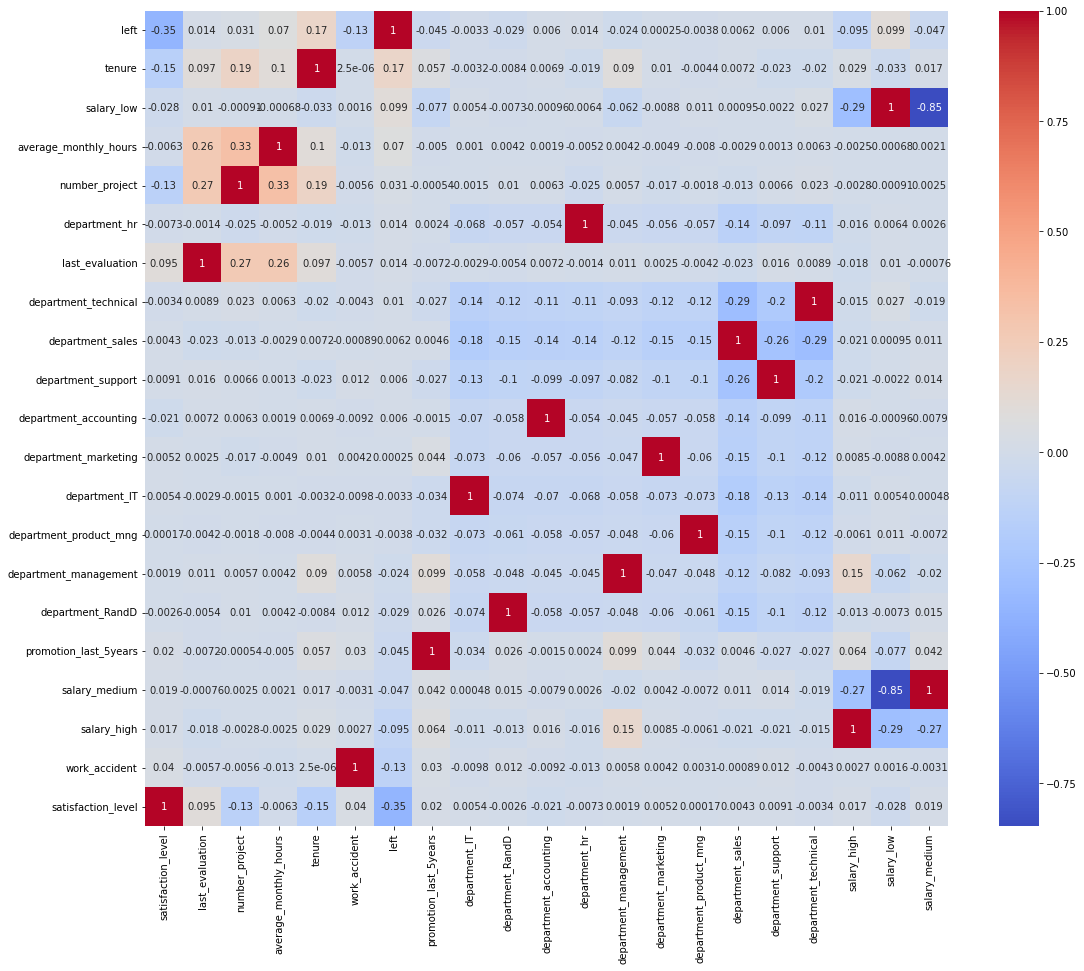

In [27]:
df_enc_corr = df_enc.corr().sort_values(by = 'left', ascending = False)

plt.figure(figsize = (18,15))
sns.heatmap(df_enc_corr, annot=True, cmap = 'coolwarm')

In [28]:
### YOUR CODE HERE ###
# Split the data

y = df_enc['left']
X = df_enc.drop(['left'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Random Forest Model

In [29]:
### YOUR CODE HERE ###
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [5,6,7], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 200],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [30]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 4min 46s, sys: 473 ms, total: 4min 47s
Wall time: 4min 47s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [31]:
# Check best params

rf1.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [32]:
# Check best AUC score on CV

rf1.best_score_

0.9477742670410343

In [33]:
%%time
# Apply best random forest parameters into the model
rf1_opt = RandomForestClassifier(n_estimators = 200,
                                max_depth = 7, 
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                max_features=1.0,
                                max_samples = 0.7,
                                random_state = 0)
rf1_opt.fit(X_train, y_train)

CPU times: user 1.8 s, sys: 4.01 ms, total: 1.81 s
Wall time: 1.81 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
# Predict on test set
y_pred_rf = rf1_opt.predict(X_test)

In [35]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [36]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [37]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [38]:
# Write pickle
write_pickle(path, rf1_opt, 'hr_rf')

In [39]:
# Read pickle
rf1_opt = read_pickle(path, 'hr_rf')

In [40]:
# Random forest model evaluation scores

print('F1 Score of RF Model:', f1_score(y_test, y_pred_rf))
print('Recall Score of RF model:', recall_score(y_test, y_pred_rf))
print('Precision Score of RF model:', precision_score(y_test, y_pred_rf))
print('Accuracy Score of RF model:', accuracy_score(y_test, y_pred_rf))
print('AUC Score of RF model:', roc_auc_score(y_test, y_pred_rf))

F1 Score of RF Model: 0.9575129533678758
Recall Score of RF model: 0.927710843373494
Precision Score of RF model: 0.9892933618843683
Accuracy Score of RF model: 0.986324216144096
AUC Score of RF model: 0.962855421686747


This random forest model has good evaluation scores. We can also plot the confusion matrix for the random forest model.

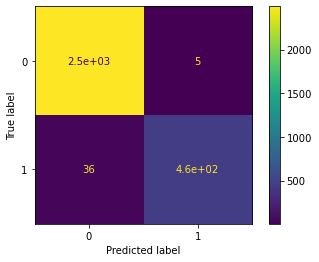

In [41]:
# Plotting a confusion matrix

cm_rf = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf1_opt.classes_)  # Use the optimized model
disp_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = rf1_opt.classes_)
disp_rf.plot()

In [42]:
cm_rf

array([[2495,    5],
       [  36,  462]])

The confusion matrix of the random forest model produced these results:

- True Negatives: 2495
- False Negatives: 5
- True Positives: 36
- False Positives: 462

We can also obtain the random forest model feature importance chart using `feature_importances_`.

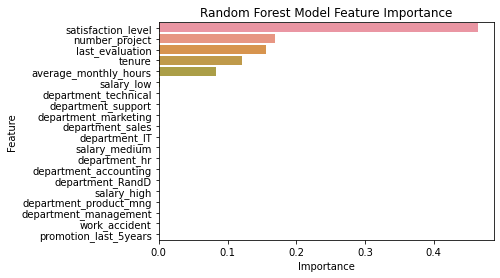

In [43]:
# Get random forest model feature importances
feature_importances_rf = rf1_opt.feature_importances_

# Create a DataFrame for visualisation
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the DataFrame by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Plot random forest model feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df)
plt.title('Random Forest Model Feature Importance')
plt.show()

The plot above shows that in this random forest model, `satisfaction_level`, `number_project`, `last_evaluation`, `tenure`, and `average_monthly_hours` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable `left`.

#### XGBoost Model

In [44]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0, tree_method='auto')
cv_params = {'max_depth': [7, 9],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100],
              'subsample': [1.0],
              'colsample_bytree': [1.0]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}   
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1', n_jobs=-1)

In [45]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 4min 11s, sys: 967 ms, total: 4min 12s
Wall time: 2min 47s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [1

In [46]:
# Check the parameters of the best-performing model
xgb1.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [47]:
# Check best AUC score on CV
xgb1.best_score_

0.9473627757070782

In [48]:
%%time
# Apply best XGBoost parameters into the model
xgb1_opt = XGBClassifier(colsample_bytree= 1.0,
                         learning_rate= 0.1,
                         max_depth= 7,
                         min_child_weight= 3,
                         n_estimators= 100,
                         subsample= 1.0,
                         random_state = 0)
xgb1_opt.fit(X_train, y_train)

CPU times: user 1min 42s, sys: 146 ms, total: 1min 42s
Wall time: 51.2 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [49]:
# Predict on the test data
y_pred_xgb = xgb1_opt.predict(X_test)

In [50]:
# Write pickle
write_pickle(path, xgb1_opt, 'hr_xgb')

In [51]:
# Read pickle
xgb1_opt = read_pickle(path, 'hr_xgb')

In [52]:
# XGBoost model evaluation scores
print('F1 Score of XGBoost Model:', f1_score(y_test, y_pred_xgb))
print('Recall Score of XGBoost model:', recall_score(y_test, y_pred_xgb))
print('Precision Score of XGBoost model:', precision_score(y_test, y_pred_xgb))
print('Accuracy Score of XGBoost model:', accuracy_score(y_test, y_pred_xgb))
print('AUC Score of XGBoost Model:', roc_auc_score(y_test, y_pred_xgb))

F1 Score of XGBoost Model: 0.9525773195876289
Recall Score of XGBoost model: 0.927710843373494
Precision Score of XGBoost model: 0.9788135593220338
Accuracy Score of XGBoost model: 0.9846564376250834
AUC Score of XGBoost Model: 0.961855421686747


The XGBoost model also has good evaluation scores. We can also plot the confusion matrix for the XGBoost model.

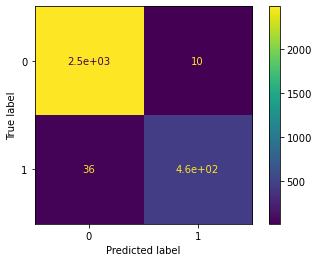

In [53]:
# Plotting a confusion matrix

cm_xgb = metrics.confusion_matrix(y_test, y_pred_xgb, labels = xgb1_opt.classes_)  # Use the optimised model
disp_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = xgb1_opt.classes_)
disp_xgb.plot()

In [54]:
cm_xgb

array([[2490,   10],
       [  36,  462]])

The confusion matrix of the XGBoost model produced these results:

- True Negatives: 2490
- False Negatives: 10
- True Positives: 36
- False Positives: 462


We can also plot the feature importance chart for the XGBoost model.

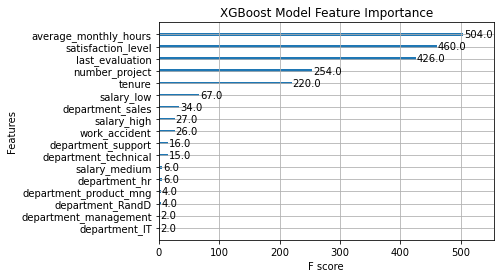

In [55]:
# Plotting XGBoost model feature importance
plot_importance(xgb1_opt)
plt.title('XGBoost Model Feature Importance')
plt.show()

The plot above shows that in this XGBoost model, `average_monthly_hours`, `satisfaction_level`, `last_evaluation`, `number_project`, and `tenure` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable `left`, and they are the same as the ones used by the random forest model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Random Forest Model Results

In [56]:
# Recall evaluation scores for Random Forest model

print('F1 Score of RF Model:', "%.3f" % f1_score(y_test, y_pred_rf))
print('Recall Score of RF model:', "%.3f" % recall_score(y_test, y_pred_rf))
print('Precision Score of RF model:', "%.3f" % precision_score(y_test, y_pred_rf))
print('Accuracy Score of RF model:', "%.3f" % accuracy_score(y_test, y_pred_rf))
print('AUC Score of RF model:', "%.3f" % roc_auc_score(y_test, y_pred_rf))

F1 Score of RF Model: 0.958
Recall Score of RF model: 0.928
Precision Score of RF model: 0.989
Accuracy Score of RF model: 0.986
AUC Score of RF model: 0.963


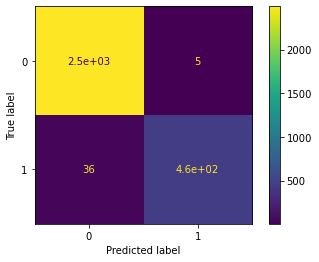

In [57]:
# Recall random forest model confusion matrix
disp_rf.plot()

In [58]:
cm_rf

array([[2495,    5],
       [  36,  462]])

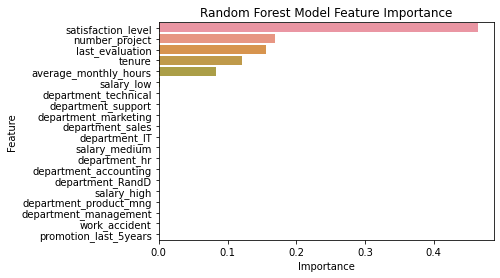

In [59]:
# Recall random forest model feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df)
plt.title('Random Forest Model Feature Importance')
plt.show()

### XGBoost Model Results

In [60]:
# Recall XGBoost model evaluation scores
print('F1 Score of XGBoost Model:', "%.3f" % f1_score(y_test, y_pred_xgb))
print('Recall Score of XGBoost model:', "%.3f" % recall_score(y_test, y_pred_xgb))
print('Precision Score of XGBoost model:', "%.3f" % precision_score(y_test, y_pred_xgb))
print('Accuracy Score of XGBoost model:', "%.3f" % accuracy_score(y_test, y_pred_xgb))
print('AUC Score of XGBoost Model:', "%.3f" % roc_auc_score(y_test, y_pred_xgb))

F1 Score of XGBoost Model: 0.953
Recall Score of XGBoost model: 0.928
Precision Score of XGBoost model: 0.979
Accuracy Score of XGBoost model: 0.985
AUC Score of XGBoost Model: 0.962


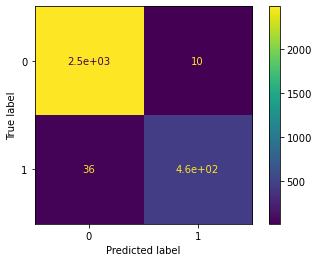

In [61]:
#Recall XGBoost model confusion matrix
disp_xgb.plot()

In [62]:
cm_xgb

array([[2490,   10],
       [  36,  462]])

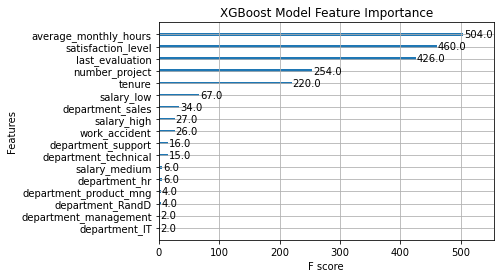

In [63]:
# Recall XGBoost feature bar chart
plot_importance(xgb1_opt)
plt.title('XGBoost Model Feature Importance')
plt.show()

### Summary of model results

It was decided to build a tree-based machine learning model to predict whether an employee will leave the company. A random forest model and an XGBoost model were built and compared to determine which model would be most suitable.

The random forest model had an F1 score of 0.958, while the XGBoost model had an F1 score of 0.953.

Based on the F1 score, we will use the Random Forest model instead of the XGBoost model. The random forest model also took less time to run than the XGBoost model.

#### Model Confusion Matrix

The confusion matrix of the random forest model produced these results:

- True Negatives: 2495 employees that did not leave the company were accurately predicted by the model to be so.
- False Negatives: 5 employees that did not leave the company were wrongly predicted by the model to have left the company.
- True Positives: 36 employees that did leave the company were accurately predicted by the model to be so.
- False Positives: 462 employees that did leave the company were inaccurately predicted by the model to have not left the company.

False negatives might cause the company to spend more resources on employees who have already decided to leave. False positives may cause the company to presume an employee will leave, and therefore they will not put resources into this employee. False negatives will be worse for the company, false positives will be worse for employees.

#### Model Evaluation Scores

The random forest model has the following evaluation scores:

1. F1 Score: 0.958
   - The model has good predictive power.
2. Recall Score: 0.928
   - 92.8% of employee turnover is correctly identified as leaving.
3. Precision Score: 0.989
   - 98.9% of employees who were predicted by the model as left have indeed left the company.
4. Accuracy Score: 0.986
   - 98.6% of the turnover is rightly predicted. However, given the imbalanced dataset, this is not sufficient for prediction.
5. AUC Score: 0.963
   - 96.3% of predictions are correct across all classification thresholds.

Based on the evaluation scores, we can consider this model to be good enough, until we have more data of employees who left.

#### Key Insights and Model Recommendations

Some of the key insights that emerged from the model include:
   - Based on the feature importance plot, `average_monthly_hours`, `satisfaction_level`, `last_evaluation`, `tenure`, and `number_project` are the most important features for predicting whether an employee will leave or not.
   - Comparing the different salary levels, employees who have a low salary were most likely to leave the company.
   - Comparing the different departments, the greatest proportion of employees who left the company were from the sales department.
   
Based on the random forest model built, some potenital recommendations that could be made to the manager/company would be:
   - Collect more data from employees who have left. The dataset has a lot less data for employees who left than those who stayed, which will impact the evaluation scores and the confusion matrix.
   - Collect more data from other departments, since there are only 10 departments in this dataset.
   - It will be better to build the `salary` feature with numerical data which shows how much an employee earns in a period of time. The salary level is ambiguous and does not provide sufficient clarity.
   
Based on the model, some business recommendations that could be proposed to the manager/company would be:
   - Reduce significantly the amount of overtime work. `average_monthly_hours` was found to be an important feature that drives employee retention. Together with the EDA, it was observed that majority of employees were working overtime.
   - Conduct further analysis on `satisfaction_level`. This is a major feature that drives employee retention. Most employees who left the company tended to have lower satisfaction levels than the employees who stayed in the company.
   - The company seems to be suffering from overflow issues. This needs to be addressed, as it appears that there is too much burden borne by very few people. It may be possible that project distribution was not carried out fairly, which should also be reviewed and changed where necessary.
   - More work can be done with the group of employees that have low `salary` levels to understand their low satisfaction levels, and find ways to increase their satisfaction levels; this group is likely to contribute to company attrition.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, I would like to present the following recommendations to the stakeholders:

* Limit the number of projects that employees can work on.
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or do not require them to do so. 
* If employees are not familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off are not explicit, make them clear. 
* Hold company-wide and team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work more than 200 hours/month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It is possible that evaluations were not performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It is also likely that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for `satisfaction_level`.

For another project, I could try building a K-means model on this data and analysing the clusters, which may yield valuable insights. 